In [1]:
# Importing modules
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

np.random.seed(42)

# 10 Year all NBA dataset
year = 10
train = pd.read_csv('train_%dyr.csv' % year)
test = pd.read_csv('test_%dyr.csv' % year)

## Take a peak in the dataset

In [2]:
train.head()

Unnamed: 0  idPlayerNBA     namePlayer  yearSeason  yearSeasonFirst  \
0           1          386   Elliot Perry        1992             1992   
1           2        76016   Mark Aguirre        1982             1982   
2           3        78392     Wes Unseld        1969             1969   
3           4          688  Michael Curry        1994             1994   
4           5         2744   Al Jefferson        2005             2005   

   yearsPlayed  maxYrsPlayed groupPosition  AllNBA10yr  agePlayer     ...      \
0            0            10             G           0         22     ...       
1            0            12             F           0         22     ...       
2            0            12             C           1         22     ...       
3            0            11             G           0         25     ...       
4            0            13             F           1         20     ...       

  drbTotals  trbTotals  astTotals  stlTotals  blkTotals  tovTotals  pfTotals  \
0        25         39         78         34          3         50        36   
1       160        249        164         37         22        135       152   
2         0       1491        213          0          0          0       276   
3         1          1          1          1          0          3         6   
4       193        312         24         22         55         66       195   

   ptsTotals  countTeamsPlayerSeasonTotals  minpergame  
0        126                             1    8.740000  
1        955                             1   28.784314  
2       1131                             1   36.219512  
3          9                             1    4.300000  
4        475                             1   14.802817  

[5 rows x 60 columns]

In [3]:
train.columns

Index(['Unnamed: 0', 'idPlayerNBA', 'namePlayer', 'yearSeason',
       'yearSeasonFirst', 'yearsPlayed', 'maxYrsPlayed', 'groupPosition',
       'AllNBA10yr', 'agePlayer', 'slugTeamBREF', 'countGames', 'minutes',
       'ratioPER', 'pctTrueShooting', 'pct3PRate', 'pctFTRate', 'pctORB',
       'pctDRB', 'pctTRB', 'pctAST', 'pctSTL', 'pctBLK', 'pctTOV', 'pctUSG',
       'ratioOWS', 'ratioDWS', 'ratioWS', 'ratioWSPer48', 'ratioOBPM',
       'ratioDBPM', 'ratioBPM', 'ratioVORP', 'countTeamsPlayerSeason',
       'countGamesStarted', 'pctFG', 'pctFG3', 'pctFG2', 'pctEFG', 'pctFT',
       'minutesTotals', 'fgmTotals', 'fgaTotals', 'fg3mTotals', 'fg3aTotals',
       'fg2mTotals', 'fg2aTotals', 'ftmTotals', 'ftaTotals', 'orbTotals',
       'drbTotals', 'trbTotals', 'astTotals', 'stlTotals', 'blkTotals',
       'tovTotals', 'pfTotals', 'ptsTotals', 'countTeamsPlayerSeasonTotals',
       'minpergame'],
      dtype='object')

In [4]:
print("Training Data Shape:", train.shape)
print("Testing Data Shape:", test.shape)

Training Data Shape: (532, 60)
Testing Data Shape: (177, 60)


In [5]:
train['AllNBA10yr'].value_counts()

0    422
1    110
Name: AllNBA10yr, dtype: int64

In [55]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

In [44]:
cat_columns = ['groupPosition', 'slugTeamBREF']

columns = ['maxYrsPlayed', 'agePlayer', 'countGames', 'minutes',
       'ratioPER', 'pctTrueShooting', 'pct3PRate', 'pctFTRate', 'pctORB',
       'pctDRB', 'pctTRB', 'pctAST', 'pctSTL', 'pctBLK', 'pctTOV', 'pctUSG',
       'ratioOWS', 'ratioDWS', 'ratioWS', 'ratioWSPer48', 'ratioOBPM',
       'ratioDBPM', 'ratioBPM', 'ratioVORP', 'countTeamsPlayerSeason',
       'countGamesStarted', 'pctFG', 'pctFG3', 'pctFG2', 'pctEFG', 'pctFT',
       'minutesTotals', 'fgmTotals', 'fgaTotals', 'fg3mTotals', 'fg3aTotals',
       'fg2mTotals', 'fg2aTotals', 'ftmTotals', 'ftaTotals', 'orbTotals',
       'drbTotals', 'trbTotals', 'astTotals', 'stlTotals', 'blkTotals',
       'tovTotals', 'pfTotals', 'ptsTotals', 'countTeamsPlayerSeasonTotals',
       'minpergame']




In [7]:
# X_train = np.array(train.loc[:, columns])
# X_test = np.array(test.loc[:, columns])

# y_train = np.array(train.loc[:, 'AllNBA%dyr' % year])
# y_test = np.array(test.loc[:, 'AllNBA%dyr' % year])

In [48]:
X_train = np.array(train.loc[:, columns])
X_test = np.array(test.loc[:, columns])

y_train = np.array(train.loc[:, 'AllNBA%dyr' % year])
y_test = np.array(test.loc[:, 'AllNBA%dyr' % year])

In [49]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(532, 51)
(177, 51)
(532,)
(177,)


In [50]:
print((y_train==0).sum())
print((y_test==0).sum())

422
133


## Looking the importance of age in getting the All NBA Award

In [51]:
df1 = train['AllNBA10yr'].groupby(train['agePlayer'])

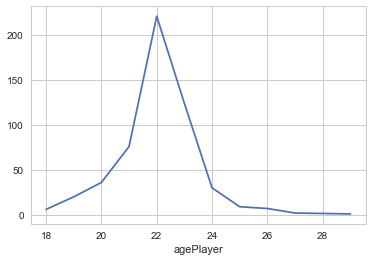

In [53]:
df1.count().plot()

We can see observe that players in the age slab of 21-23 are more likely to get an ALL NBA Player award within 10 years of their rookie season.  

## Feature Selection

### Using Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

# Logistic with L1 Norm (Lasso)
clf_LogReg_L1Norm_CV = LogisticRegressionCV(Cs=100, cv=5, penalty='l1', solver='saga')
clf_LogReg_L2Norm_CV = LogisticRegressionCV(Cs=100, cv=5, penalty='l2')
# Fit the linear regression
clf_LogReg_L1Norm_CV.fit(X_train_std, y_train)
clf_LogReg_L2Norm_CV.fit(X_train_std, y_train)

In [29]:
print('Selected C Value for Logistic Regression (L1 Norm Penalty) Model:', clf_LogReg_L1Norm_CV.C_[0])
print('Selected C Value for Logistic Regression (L2 Norm Penalty) Model:', clf_LogReg_L2Norm_CV.C_[0])

Selected C Value for Logistic Regression (L1 Norm Penalty) Model: 0.6280291441834259
Selected C Value for Logistic Regression (L2 Norm Penalty) Model: 0.1176811952434999


### Performing Logistic Regression for Feature Selection

In [30]:
from sklearn.linear_model import LogisticRegression

clf_LogReg_L1Norm = LogisticRegression(C=clf_LogReg_L1Norm_CV.C_[0], penalty='l1')
clf_LogReg_L1Norm.fit(X_train_std, y_train)


y_pred = clf_LogReg_L1Norm.predict(scaler.fit_transform(X_test))

print('In-Sample Accuracy', metrics.accuracy_score(y_true=y_train, y_pred=clf_LogReg_L1Norm.predict(X_train_std)))
print('Out-Sample Accuracy', metrics.accuracy_score(y_true=y_test, y_pred=y_pred))

In-Sample Accuracy 0.8227272727272728
Out-Sample Accuracy 0.6271186440677966


In [31]:
LogReg_L1Norm_coeff_df = pd.DataFrame(index=columns, data=clf_LogReg_L1Norm.coef_.reshape(-1,1), columns=['Logistic (L1 norm) Coefficient'])

In [33]:

clf_LogReg_L2Norm = LogisticRegression(C=clf_LogReg_L2Norm_CV.C_[0], penalty='l2')
clf_LogReg_L2Norm.fit(X_train_std, y_train)

y_pred = clf_LogReg_L2Norm.predict(scaler.fit_transform(X_test))

print('In-Sample Accuracy', metrics.accuracy_score(y_true=y_train, y_pred=clf_LogReg_L2Norm.predict(X_train_std)))
print('Out-Sample Accuracy', metrics.accuracy_score(y_true=y_test, y_pred=y_pred))

In-Sample Accuracy 0.8363636363636363
Out-Sample Accuracy 0.6497175141242938


In [34]:
LogReg_L2Norm_coeff_df = pd.DataFrame(index=columns, data=clf_LogReg_L2Norm.coef_.reshape(-1,1), columns=['Logistic (L2 norm) Coefficient'])

In [35]:
coeff_df = pd.concat([LogReg_L1Norm_coeff_df, LogReg_L2Norm_coeff_df], axis=1)
coeff_df

Logistic (L1 norm) Coefficient  \
maxYrsPlayed                                        0.665908   
agePlayer                                          -0.532922   
countGames                                         -0.265369   
minutes                                             0.000000   
ratioPER                                            0.000000   
pctTrueShooting                                     0.000000   
pct3PRate                                           0.000000   
pctFTRate                                           0.129231   
pctORB                                             -0.028838   
pctDRB                                              0.000000   
pctTRB                                             -0.131329   
pctAST                                             -0.020887   
pctSTL                                             -0.080403   
pctBLK                                             -0.355934   
pctTOV                                             -0.425274   
pctUSG                                             -0.322057   
ratioOWS                                            0.000000   
ratioDWS                                            0.374227   
ratioWS                                             0.565657   
ratioWSPer48                                        0.302000   
ratioOBPM                                           0.270487   
ratioDBPM                                          -0.053091   
ratioBPM                                            0.000000   
ratioVORP                                           0.000000   
countTeamsPlayerSeason                              0.000000   
countGamesStarted                                   0.017070   
pctFG                                               0.000000   
pctFG3                                             -0.383744   
pctFG2                                              0.000000   
pctEFG                                              0.000000   
pctFT                                               0.426538   
minutesTotals                                       0.000000   
fgmTotals                                           0.000000   
fgaTotals                                           0.000000   
fg3mTotals                                          0.000000   
fg3aTotals                                          0.229934   
fg2mTotals                                          0.000000   
fg2aTotals                                          0.000000   
ftmTotals                                           0.000000   
ftaTotals                                           0.000000   
orbTotals                                           0.000000   
drbTotals                                           0.000000   
trbTotals                                          -0.259712   
astTotals                                           0.172801   
stlTotals                                           0.000000   
blkTotals                                          -0.123205   
tovTotals                                           0.631631   
pfTotals                                           -0.054759   
ptsTotals                                           0.000000   
countTeamsPlayerSeasonTotals                        0.000000   
minpergame                                          0.038273   

                              Logistic (L2 norm) Coefficient  
maxYrsPlayed                                        0.547922  
agePlayer                                          -0.425254  
countGames                                         -0.149347  
minutes                                            -0.137198  
ratioPER                                            0.079016  
pctTrueShooting                                    -0.000930  
pct3PRate                                          -0.021729  
pctFTRate                                           0.135133  
pctORB                                             -0.070374  
pctDRB                                             -0.037750  
pctTRB  

### Selecting Features

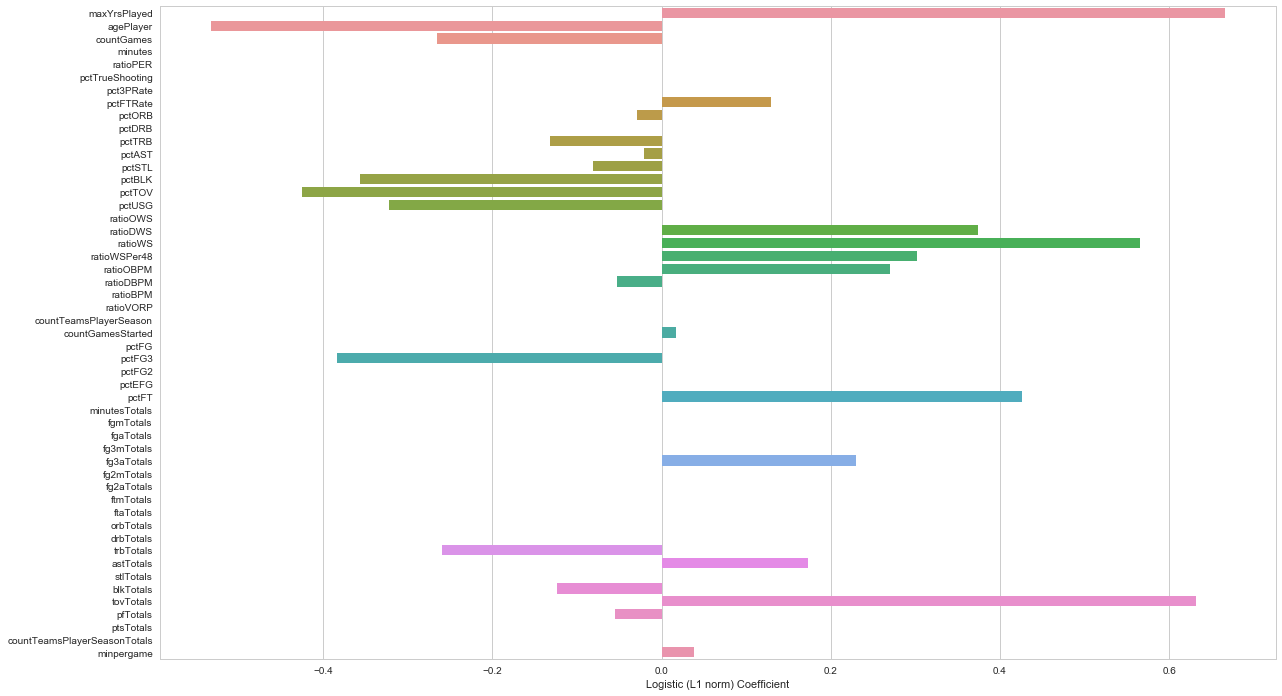

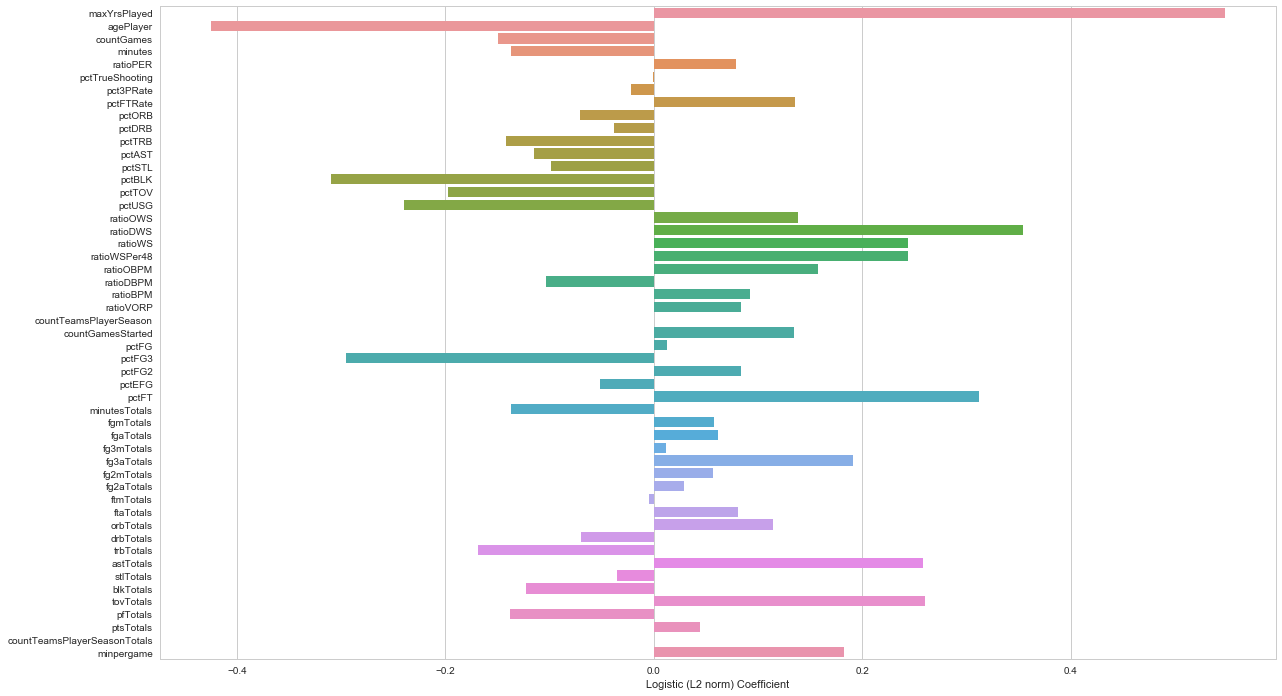

In [36]:
sns.set(style="whitegrid")

for col in coeff_df.columns:
       plt.figure(figsize=(20,12))
       sns.barplot(x=col, y=coeff_df.index, data=coeff_df)

In [42]:
coeff_df['Logistic (L1 norm) Coefficient'].nlargest()

maxYrsPlayed    0.665908
tovTotals       0.631631
ratioWS         0.565657
pctFT           0.426538
ratioDWS        0.374227
Name: Logistic (L1 norm) Coefficient, dtype: float64

In [43]:
coeff_df['Logistic (L2 norm) Coefficient'].nlargest()

maxYrsPlayed    0.547922
ratioDWS        0.354525
pctFT           0.311948
tovTotals       0.259953
astTotals       0.258490
Name: Logistic (L2 norm) Coefficient, dtype: float64

We can observe the top features selected using L1 norm and L2 norm have maxYrsPlayed, ratioDWS, pctFt, tovTotals in common. 